In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

2023-01-03 13:00:41.786433: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-03 13:00:43.248609: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.2/extras/CUPTI/lib64:/usr/local/cuda-11.2/lib64:
2023-01-03 13:00:43.251114: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.2/extras/CUPTI/lib64:/usr/local/cuda-11.2/l

In [2]:
(X_train, y_train), (X_test,y_test)=mnist.load_data()
print("X_train shape :", X_train.shape)
print("y_train shape :", y_train.shape)

X_train shape : (60000, 28, 28)
y_train shape : (60000,)


In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

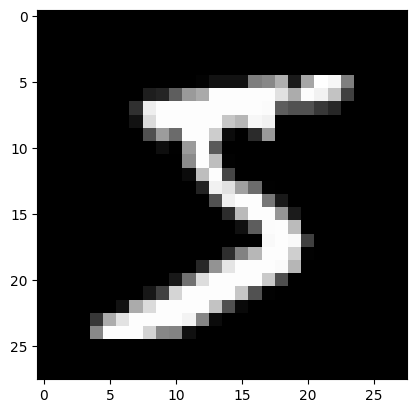

In [9]:
plt.imshow(X_train[0],cmap='gray')

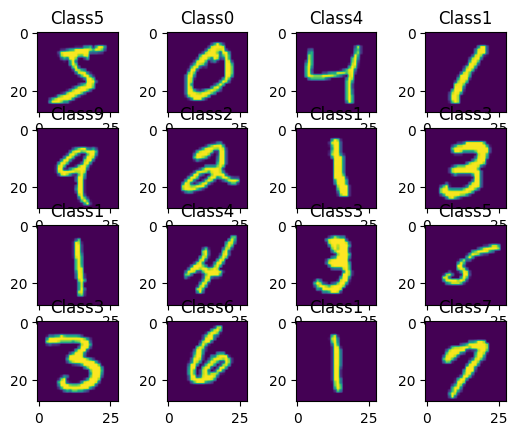

In [12]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[i])
    plt.title("Class{}".format(y_train[i]))
    plt.tight_layout

## X_train.reshape(60000, 784)
- X_train shape : (60000, 28, 28) 의 형상을
- X_train shape : (60000, 784) 의 형태로 flat 하게 만들어주자

- y_train shape : (60000,) 의 형상은 변경해줄 필요없다. 

In [13]:
y_train[0]

5

In [14]:
X_test.shape

(10000, 28, 28)

In [3]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

In [4]:
Y_train = tf.keras.utils.to_categorical(y_train)# one hot encoding
Y_test = tf.keras.utils.to_categorical(y_test)

In [15]:
Y_train.shape # label data(정답 데이터) 확인

(60000, 10)

In [17]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [5]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

2023-01-03 13:01:05.412893: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-01-03 13:01:05.430293: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-01-03 13:01:05.430341: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-01-03 13:01:05.431361: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, 

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

In [9]:
history=model.fit(X_train, Y_train, batch_size=32, epochs=20)

Epoch 1/20


2023-01-03 13:02:13.700059: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-01-03 13:02:13.860713: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f35c1e7c6d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-01-03 13:02:13.860754: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3080 Ti, Compute Capability 8.6
2023-01-03 13:02:13.888678: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-01-03 13:02:14.185317: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 15s 6ms/step - loss: 1.4619 - accuracy: 0.9071
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2026 - accuracy: 0.9481
Epoch 3/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1930 - accuracy: 0.9520
Epoch 4/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1689 - accuracy: 0.9581
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1610 - accuracy: 0.9600
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1234 - accuracy: 0.9690
Epoch 7/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1176 - accuracy: 0.9712
Epoch 8/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1046 - accuracy: 0.9747
Epoch 9/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0963 - accuracy: 0.9766
Epoch 10/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0913

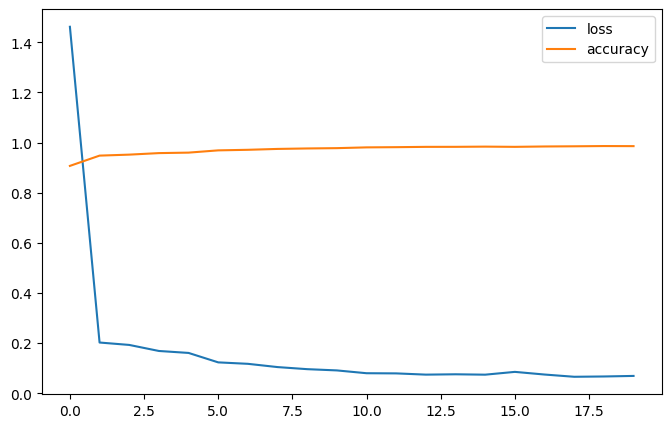

In [11]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [12]:
np.round(model.predict(X_test))[0]

313/313 [==============================] - 1s 2ms/step


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [16]:
np.argmax(model.predict(X_test)[0]) # array 중에서 최대인 값의 index를 반환 ->  one hot encoding 으로 인해 0 1 0 따위로 입력되어있음.

313/313 [==============================] - 1s 2ms/step


7

In [13]:
y_test[0]

7

In [14]:
score = model.evaluate(X_test, Y_test,
                       verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.2038404792547226
Test accuracy: 0.9703999757766724


In [ ]:
# model.save("modelname.h5")
# test_img = test_img.reshape(1,784)# model 학습시에 input_shape을 지정 -> 1개 data에 대한 shape -> 실제 학습시 -> (32, 784) -> test시에도 (1, 784)로 변경하여  data를 입력해야 한다. 